Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# === Setup ===
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Paths (adjust if needed)
DATA_PATH   = "automobile.txt"      # keep the text file in same folder as notebook
CLEAN_CSV   = "automobile_clean.csv"
FIG_DIR     = "eda_figs"
REPORT_PDF  = "EDA Report – Automobile Dataset.pdf"

os.makedirs(FIG_DIR, exist_ok=True)
pd.set_option("display.max_columns", None)


In [2]:
# === Load Data (comma-separated text) ===
df_raw = pd.read_csv(DATA_PATH, sep=",")

print("Raw shape:", df_raw.shape)
display(df_raw.head())


Raw shape: (205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [3]:
# === Clean & Sanitise ===
df = df_raw.copy()

# Replace '?' with NaN
df = df.replace("?", np.nan)

# Strip whitespace in object columns
for c in df.columns:
    if df[c].dtype == object:
        df[c] = df[c].astype(str).str.strip()

# Columns that should be numeric
numeric_like = [
    "symboling","normalized-losses","wheel-base","length","width","height","curb-weight",
    "engine-size","bore","stroke","compression-ratio","horsepower","peak-rpm",
    "city-mpg","highway-mpg","price"
]
for c in numeric_like:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

print("Top missing-value columns:")
display(df.isna().sum().sort_values(ascending=False).head(10))



Top missing-value columns:


normalized-losses    41
stroke                4
price                 4
bore                  4
horsepower            2
peak-rpm              2
make                  0
fuel-type             0
aspiration            0
symboling             0
dtype: int64

#### Remove any duplicate rows

In [4]:
# === Remove Duplicate Rows ===
before_dupes = len(df)
df = df.drop_duplicates()
dupes_removed = before_dupes - len(df)

print("Duplicates removed:", dupes_removed)
print("Shape after removing duplicates:", df.shape)


Duplicates removed: 0
Shape after removing duplicates: (205, 26)


#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [27]:
# === Drop Rows with Any Missing Values ===
before_dropna = len(df)
df = df.dropna(how="any").reset_index(drop=True)
rows_dropped_missing = before_dropna - len(df)

print("Rows dropped due to missing values:", rows_dropped_missing)
print("Shape after dropping missing values:", df.shape)


Rows dropped due to missing values: 45
Shape after dropping missing values: (160, 26)


Change columns with numerical data column to an integer data type using numpy’s `int64` method.

In [5]:
# === Dtype Fixes for Categoricals & Post-clean Stats ===
categorical_cols = [
    "make","fuel-type","aspiration","num-of-doors","body-style",
    "drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system"
]
for c in categorical_cols:
    if c in df.columns:
        df[c] = df[c].astype("category")

# Save cleaned data
df.to_csv(CLEAN_CSV, index=False)
print("Saved cleaned CSV to:", CLEAN_CSV)

print("\nDtypes:")
print(df.dtypes)

print("\nNumerical summary (post-clean):")
display(df.describe().T)

print("\nCategorical summary (post-clean):")
display(df.describe(include="category").T)


Saved cleaned CSV to: automobile_clean.csv

Dtypes:
symboling               int64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type          category
num-of-cylinders     category
engine-size             int64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object

Numerical summary (post-clean):


,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17



Categorical summary (post-clean):


,count,unique,top,freq
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,3,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159
fuel-system,205,8,mpfi,94


### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

Hatchback cars shape: (70, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.50,48.0,5100.0,47,53,5151.0
19,1,98.0,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70.0,5400.0,38,43,6295.0
21,1,118.0,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.41,68.0,5500.0,37,41,5572.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2414,ohc,four,122,mpfi,3.31,3.54,8.70,92.0,4200.0,27,32,9988.0
177,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2458,ohc,four,122,mpfi,3.31,3.54,8.70,92.0,4200.0,27,32,11248.0
178,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.30,161.0,5200.0,20,24,16558.0
179,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.30,161.0,5200.0,19,24,15998.0


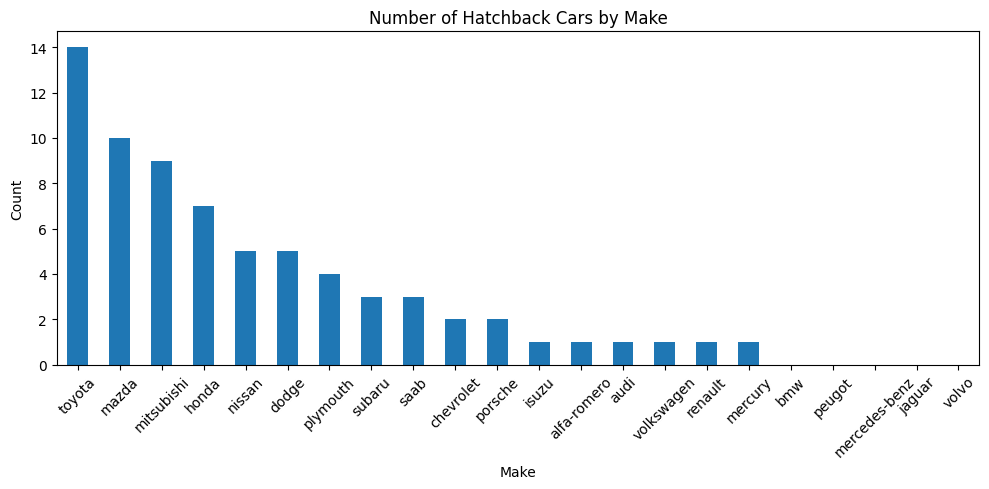

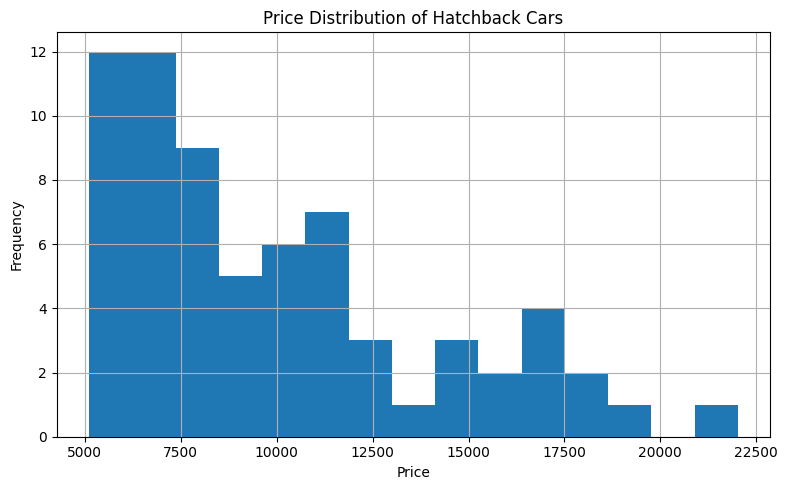

In [6]:
## === Hatchback subset: table + graphs ===
from IPython.display import display

# Filter table
hatchback_cars = df[df["body-style"] == "hatchback"]
print("Hatchback cars shape:", hatchback_cars.shape)
display(hatchback_cars)

# Graph 1: Count of hatchbacks by make
plt.figure(figsize=(10,5))
hatchback_cars["make"].value_counts().plot(kind="bar")
plt.title("Number of Hatchback Cars by Make")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "hatchbacks_by_make.png"), bbox_inches="tight")
plt.show()

# Graph 2: Price distribution for hatchbacks
plt.figure(figsize=(8,5))
hatchback_cars["price"].hist(bins=15)
plt.title("Price Distribution of Hatchback Cars")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "hatchback_price_hist.png"), bbox_inches="tight")
plt.show()


In [7]:
# === EDA: Key Summaries ===
top_makes_by_count = df["make"].value_counts().head(10)
avg_price_by_make  = df.groupby("make")["price"].mean().sort_values(ascending=False).head(10)
avg_price_by_body  = df.groupby("body-style")["price"].mean().sort_values(ascending=False)

corr = df[numeric_like].corr(numeric_only=True)
corr_with_price = corr["price"].drop(labels=["price"]).sort_values(ascending=False)

print("Top 10 makes by count:\n", top_makes_by_count, "\n")
print("Top 10 makes by avg price:\n", avg_price_by_make, "\n")
print("Avg price by body style:\n", avg_price_by_body, "\n")
print("Correlations with price:\n", corr_with_price)


Top 10 makes by count:
 make
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
subaru        12
volkswagen    12
volvo         11
peugot        11
dodge          9
Name: count, dtype: int64 

Top 10 makes by avg price:
 make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          31400.500000
bmw              26118.750000
volvo            18063.181818
audi             17859.166667
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
Name: price, dtype: float64 

Avg price by body style:
 body-style
hardtop        22208.500000
convertible    21890.500000
sedan          14459.755319
wagon          12371.960000
hatchback       9957.441176
Name: price, dtype: float64 

Correlations with price:
 engine-size          0.872335
curb-weight          0.834415
horsepower           0.810533
width                0.751265
length               0.690628
wheel-base           0.5846

/var/folders/yn/0p6sbsw13m75yyhtfmf5t8pc0000gn/T/ipykernel_38072/3483161966.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_make  = df.groupby("make")["price"].mean().sort_values(ascending=False).head(10)
/var/folders/yn/0p6sbsw13m75yyhtfmf5t8pc0000gn/T/ipykernel_38072/3483161966.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_body  = df.groupby("body-style")["price"].mean().sort_values(ascending=False)


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some moviecars are worth the money spent on them based on their fuel economy (mpg or miles per gallon)

In [8]:
# === Top 5 Most Expensive vs Bottom 5 Cheapest (Tables + Summary) ===
from IPython.display import display

# Create a combined mpg metric for quick comparisons
df_eval = df.copy()
df_eval["combined-mpg"] = (df_eval["city-mpg"] + df_eval["highway-mpg"]) / 2

cols_show = [
    "make","body-style","fuel-type","engine-size","horsepower",
    "city-mpg","highway-mpg","combined-mpg","price"
]

top5 = df_eval.nlargest(5, "price")[cols_show]
bottom5 = df_eval.nsmallest(5, "price")[cols_show]

print("Top 5 most expensive cars:")
display(top5)

print("\nBottom 5 cheapest cars:")
display(bottom5)

# Side-by-side summary comparison
comp = pd.DataFrame({
    "group": ["Top 5 (expensive)", "Bottom 5 (cheap)"],
    "avg_price": [top5["price"].mean(), bottom5["price"].mean()],
    "avg_city_mpg": [top5["city-mpg"].mean(), bottom5["city-mpg"].mean()],
    "avg_highway_mpg": [top5["highway-mpg"].mean(), bottom5["highway-mpg"].mean()],
    "avg_combined_mpg": [top5["combined-mpg"].mean(), bottom5["combined-mpg"].mean()],
    "avg_hp": [top5["horsepower"].mean(), bottom5["horsepower"].mean()],
    "avg_engine_size": [top5["engine-size"].mean(), bottom5["engine-size"].mean()],
}).round(2)

print("\nComparison (Expensive vs Cheap):")
display(comp)




Top 5 most expensive cars:


,make,body-style,fuel-type,engine-size,horsepower,city-mpg,highway-mpg,combined-mpg,price
74,mercedes-benz,hardtop,gas,304,184.0,14,16,15.0,45400.0
16,bmw,sedan,gas,209,182.0,16,22,19.0,41315.0
73,mercedes-benz,sedan,gas,308,184.0,14,16,15.0,40960.0
128,porsche,convertible,gas,194,207.0,17,25,21.0,37028.0
17,bmw,sedan,gas,209,182.0,15,20,17.5,36880.0



Bottom 5 cheapest cars:


,make,body-style,fuel-type,engine-size,horsepower,city-mpg,highway-mpg,combined-mpg,price
138,subaru,hatchback,gas,97,69.0,31,36,33.5,5118.0
18,chevrolet,hatchback,gas,61,48.0,47,53,50.0,5151.0
50,mazda,hatchback,gas,91,68.0,30,31,30.5,5195.0
150,toyota,hatchback,gas,92,62.0,35,39,37.0,5348.0
76,mitsubishi,hatchback,gas,92,68.0,37,41,39.0,5389.0



Comparison (Expensive vs Cheap):


,group,avg_price,avg_city_mpg,avg_highway_mpg,avg_combined_mpg,avg_hp,avg_engine_size
0,Top 5 (expensive),40316.6,15.2,19.8,17.5,187.8,244.8
1,Bottom 5 (cheap),5240.2,36.0,40.0,38.0,63.0,86.6


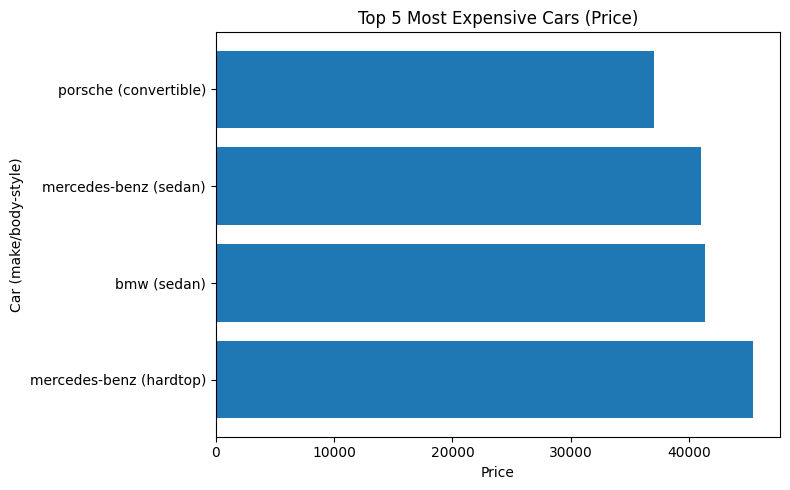

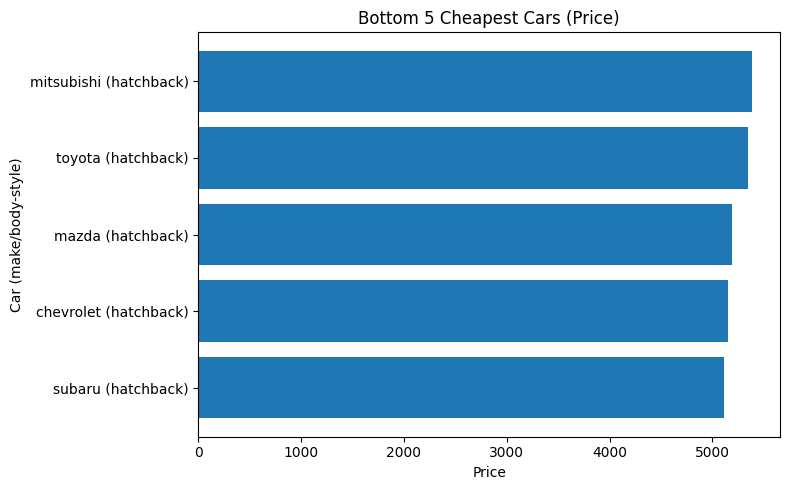

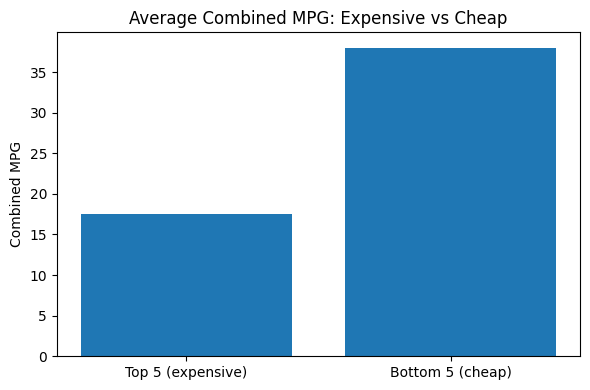

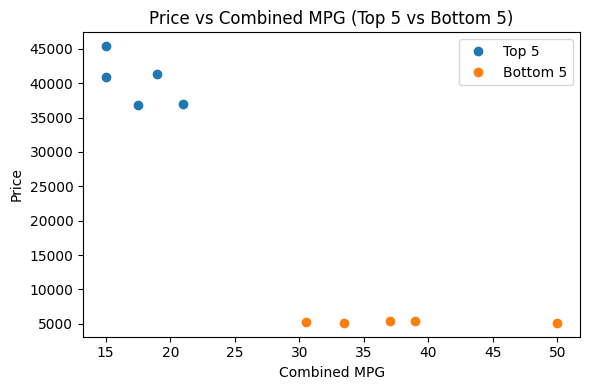

In [9]:
# === Graphs: Expensive vs Cheap (fixed for categorical labels) ===

# 1) Top 5 prices (horizontal bar)
plt.figure(figsize=(8,5))
labels_top = top5["make"].astype(str) + " (" + top5["body-style"].astype(str) + ")"
plt.barh(labels_top, top5["price"])
plt.title("Top 5 Most Expensive Cars (Price)")
plt.xlabel("Price")
plt.ylabel("Car (make/body-style)")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "top5_price_barh.png"), bbox_inches="tight")
plt.show()

# 2) Bottom 5 prices (horizontal bar)
plt.figure(figsize=(8,5))
labels_bot = bottom5["make"].astype(str) + " (" + bottom5["body-style"].astype(str) + ")"
plt.barh(labels_bot, bottom5["price"])
plt.title("Bottom 5 Cheapest Cars (Price)")
plt.xlabel("Price")
plt.ylabel("Car (make/body-style)")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "bottom5_price_barh.png"), bbox_inches="tight")
plt.show()

# 3) Average combined mpg: expensive vs cheap
plt.figure(figsize=(6,4))
plt.bar(["Top 5 (expensive)","Bottom 5 (cheap)"],
        [top5["combined-mpg"].mean(), bottom5["combined-mpg"].mean()])
plt.title("Average Combined MPG: Expensive vs Cheap")
plt.ylabel("Combined MPG")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "expensive_vs_cheap_combined_mpg.png"), bbox_inches="tight")
plt.show()

# 4) (Optional) Price vs Combined MPG scatter for both groups
plt.figure(figsize=(6,4))
plt.plot(top5["combined-mpg"], top5["price"], linestyle="none", marker="o", label="Top 5")
plt.plot(bottom5["combined-mpg"], bottom5["price"], linestyle="none", marker="o", label="Bottom 5")
plt.title("Price vs Combined MPG (Top 5 vs Bottom 5)")
plt.xlabel("Combined MPG")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "price_vs_combined_mpg_top_vs_bottom.png"), bbox_inches="tight")
plt.show()


#### Which manufacturer builds the most fuel efficient vehicles?

Compare the average mpg for each vehicle manufacture's vehicles and create a bar plot

In [10]:
# === Which manufacturer builds the most fuel-efficient vehicles? ===
# We'll use combined MPG = (city-mpg + highway-mpg) / 2
df_mpg = df.copy()
df_mpg["combined-mpg"] = (df_mpg["city-mpg"] + df_mpg["highway-mpg"]) / 2

# Average combined MPG by manufacturer (make)
avg_combined_mpg_by_make = (
    df_mpg.groupby("make")["combined-mpg"]
          .mean()
          .sort_values(ascending=False)
)

print("Top 10 manufacturers by average combined MPG:")
display(avg_combined_mpg_by_make.head(10).to_frame(name="avg_combined_mpg"))

# Most fuel-efficient manufacturer overall
best_maker = avg_combined_mpg_by_make.index[0]
best_val = avg_combined_mpg_by_make.iloc[0]
print(f"\nMost fuel-efficient manufacturer: {best_maker} (avg combined MPG ≈ {best_val:.2f})")




Top 10 manufacturers by average combined MPG:


/var/folders/yn/0p6sbsw13m75yyhtfmf5t8pc0000gn/T/ipykernel_38072/860078554.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mpg.groupby("make")["combined-mpg"]


,avg_combined_mpg
make,
chevrolet,43.666667
isuzu,33.500000
honda,32.923077
volkswagen,31.750000
plymouth,31.142857
dodge,31.055556
toyota,30.203125
nissan,29.972222
mazda,28.823529



Most fuel-efficient manufacturer: chevrolet (avg combined MPG ≈ 43.67)


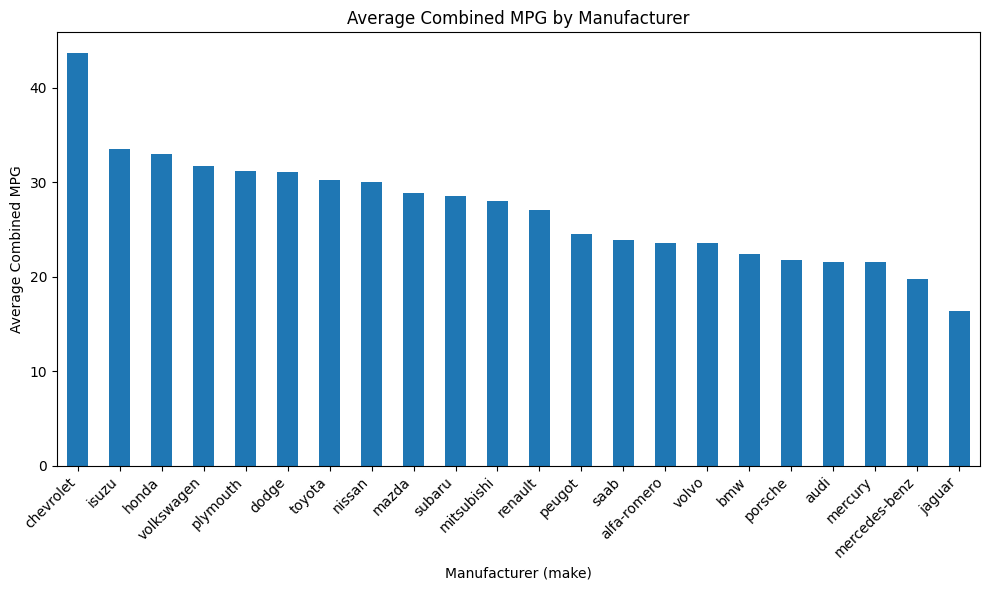

Figure saved to: eda_figs/avg_combined_mpg_by_make.png


In [11]:
# === Bar plot: Average combined MPG by manufacturer ===
plt.figure(figsize=(10,6))
avg_combined_mpg_by_make.plot(kind="bar")
plt.title("Average Combined MPG by Manufacturer")
plt.xlabel("Manufacturer (make)")
plt.ylabel("Average Combined MPG")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save and show
out_path = os.path.join(FIG_DIR, "avg_combined_mpg_by_make.png")
plt.savefig(out_path, bbox_inches="tight")
plt.show()

print("Figure saved to:", out_path)


#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.

In [12]:
# === Vehicles with the largest engine capacity ===
# Sort the dataframe by engine-size (descending) and inspect the top rows
df_engine_sorted = df.sort_values(by="engine-size", ascending=False).reset_index(drop=True)

# Show the top 10 largest engines as a neat table
cols_show = ["make", "body-style", "fuel-type", "engine-type", "num-of-cylinders",
             "engine-size", "horsepower", "price"]
display(df_engine_sorted[cols_show].head(10))

print("Largest engine size in dataset:", df_engine_sorted.loc[0, "engine-size"])




,make,body-style,fuel-type,engine-type,num-of-cylinders,engine-size,horsepower,price
0,jaguar,sedan,gas,ohcv,twelve,326,262.0,36000.0
1,mercedes-benz,sedan,gas,ohcv,eight,308,184.0,40960.0
2,mercedes-benz,hardtop,gas,ohcv,eight,304,184.0,45400.0
3,jaguar,sedan,gas,dohc,six,258,176.0,35550.0
4,jaguar,sedan,gas,dohc,six,258,176.0,32250.0
5,mercedes-benz,sedan,gas,ohcv,eight,234,155.0,34184.0
6,mercedes-benz,convertible,gas,ohcv,eight,234,155.0,35056.0
7,bmw,sedan,gas,ohc,six,209,182.0,41315.0
8,bmw,sedan,gas,ohc,six,209,182.0,36880.0
9,bmw,sedan,gas,ohc,six,209,182.0,30760.0


Largest engine size in dataset: 326


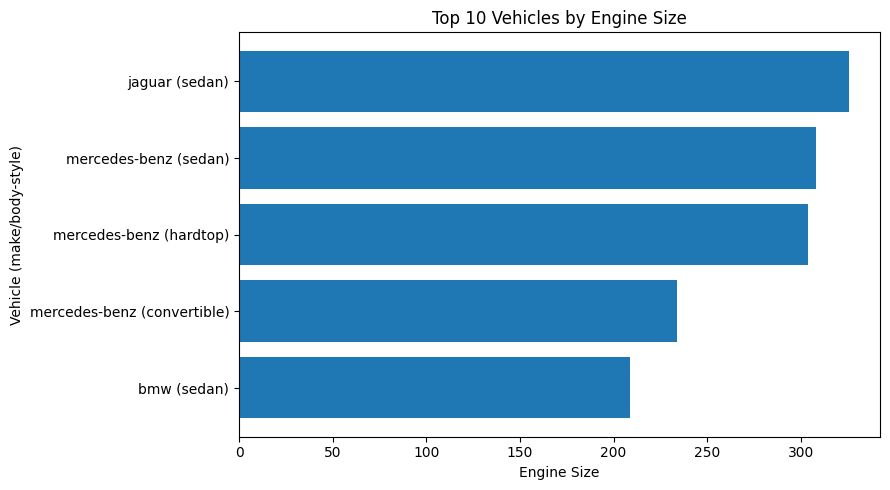

Figure saved to: eda_figs/top10_engine_size.png


In [13]:
# === Plot: Top 10 engine capacities (fixed label creation) ===
plt.figure(figsize=(9,5))

top10 = df_engine_sorted.head(10).copy()

# Build safe string labels from categorical columns
labels = top10["make"].astype(str) + " (" + top10["body-style"].astype(str) + ")"

plt.barh(labels, top10["engine-size"])
plt.title("Top 10 Vehicles by Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Vehicle (make/body-style)")
plt.gca().invert_yaxis()  # biggest at top
plt.tight_layout()

out_path = os.path.join(FIG_DIR, "top10_engine_size.png") if "FIG_DIR" in globals() else "top10_engine_size.png"
plt.savefig(out_path, bbox_inches="tight")
plt.show()
print("Figure saved to:", out_path)



#### Which vehicle manufacturer has the most car models in the dataset

,count
make,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,12
volvo,11
peugot,11


Manufacturer with the most models/variants: toyota (32)


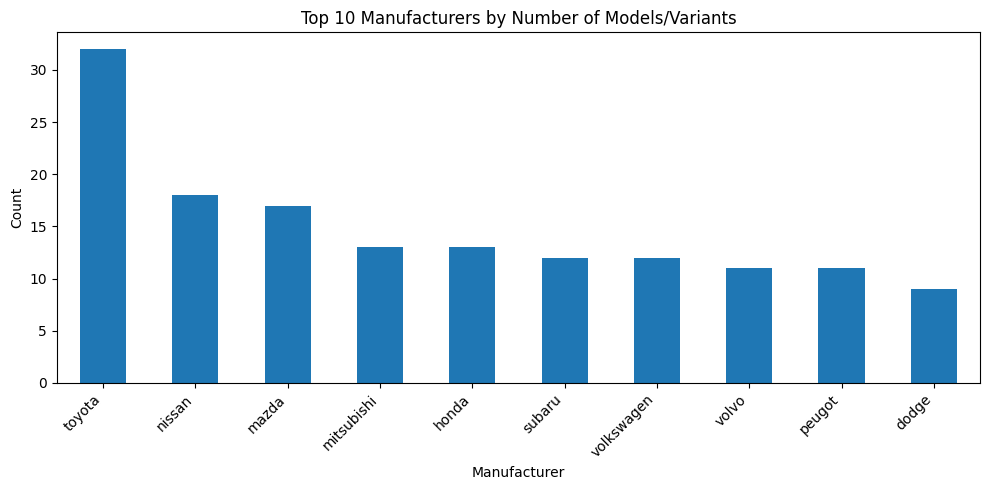

Figure saved to: eda_figs/models_per_make_top10.png


In [14]:
# === Which manufacturer has the most car models in the dataset? ===

# Count rows per manufacturer (make)
models_per_make = df["make"].value_counts()

# Show full table (descending)
display(models_per_make.to_frame(name="count"))

# Identify the top manufacturer
top_make = models_per_make.index[0]
top_count = int(models_per_make.iloc[0])
print(f"Manufacturer with the most models/variants: {top_make} ({top_count})")

# Bar chart of top 10 manufacturers by count
plt.figure(figsize=(10,5))
models_per_make.head(10).plot(kind="bar")
plt.title("Top 10 Manufacturers by Number of Models/Variants")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save + show
out_path = os.path.join(FIG_DIR, "models_per_make_top10.png") if "FIG_DIR" in globals() else "models_per_make_top10.png"
plt.savefig(out_path, bbox_inches="tight")
plt.show()
print("Figure saved to:", out_path)




/var/folders/yn/0p6sbsw13m75yyhtfmf5t8pc0000gn/T/ipykernel_38072/3794198519.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_models_per_make = unique_configs.groupby("make").size().sort_values(ascending=False)


,unique_model_proxy_count
make,
toyota,20
nissan,12
mazda,10
volkswagen,9
mitsubishi,8
dodge,7
honda,7
plymouth,7
volvo,7


Top by unique configuration proxy: toyota (20)


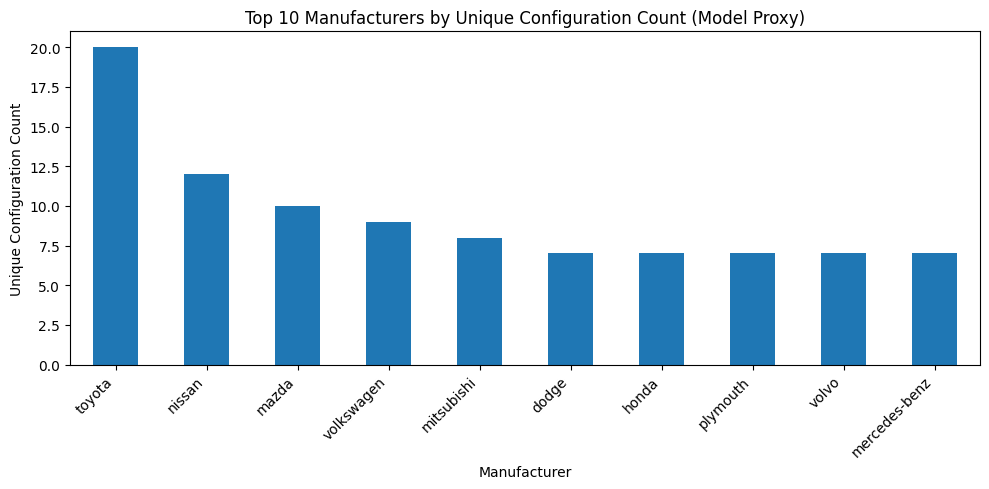

Figure saved to: eda_figs/unique_models_per_make_top10.png


In [15]:
# === Optional: unique configuration proxy for "models" ===
proxy_cols = ["make", "body-style", "fuel-type", "aspiration", "num-of-doors",
              "engine-type", "num-of-cylinders", "engine-size"]
unique_configs = df[proxy_cols].drop_duplicates()

unique_models_per_make = unique_configs.groupby("make").size().sort_values(ascending=False)
display(unique_models_per_make.to_frame(name="unique_model_proxy_count"))

top_make_proxy = unique_models_per_make.index[0]
top_count_proxy = int(unique_models_per_make.iloc[0])
print(f"Top by unique configuration proxy: {top_make_proxy} ({top_count_proxy})")

# Plot top 10 (proxy)
plt.figure(figsize=(10,5))
unique_models_per_make.head(10).plot(kind="bar")
plt.title("Top 10 Manufacturers by Unique Configuration Count (Model Proxy)")
plt.xlabel("Manufacturer")
plt.ylabel("Unique Configuration Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

out_path2 = os.path.join(FIG_DIR, "unique_models_per_make_top10.png") if "FIG_DIR" in globals() else "unique_models_per_make_top10.png"
plt.savefig(out_path2, bbox_inches="tight")
plt.show()
print("Figure saved to:", out_path2)


Top manufacturer: toyota (32 entries)


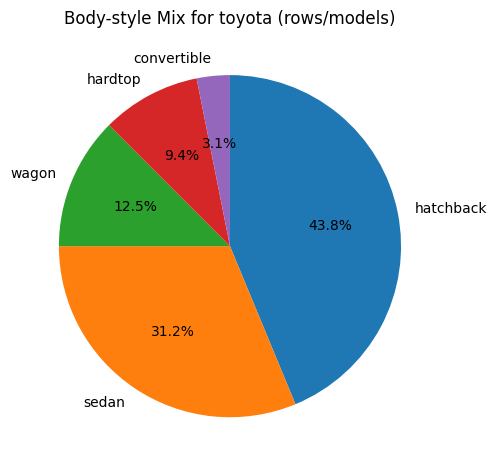

Saved: eda_figs/toyota_body_style_pie.png


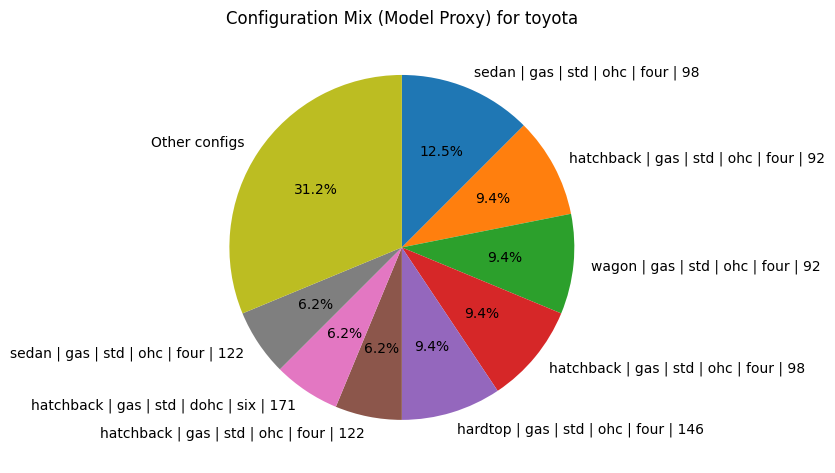

Saved: eda_figs/toyota_model_proxy_pie.png


In [16]:
# === Pie chart of the models for the #1 manufacturer ===

# Find the manufacturer with the most entries
models_per_make = df["make"].value_counts()
top_make = models_per_make.index[0]
df_top = df[df["make"] == top_make]

print(f"Top manufacturer: {top_make} ({int(models_per_make.iloc[0])} entries)")

# -----------------------------
# Option A: Body-style mix (simple/readable)
# -----------------------------
bs_counts = df_top["body-style"].astype(str).value_counts()

plt.figure()
plt.pie(
    bs_counts.values,
    labels=bs_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title(f"Body-style Mix for {top_make} (rows/models)")
plt.tight_layout()
out_path_a = os.path.join(FIG_DIR, f"{top_make}_body_style_pie.png") if "FIG_DIR" in globals() else f"{top_make}_body_style_pie.png"
plt.savefig(out_path_a, bbox_inches="tight")
plt.show()
print("Saved:", out_path_a)

# -----------------------------
# Option B: 'Model' proxy pie (unique configurations of key specs)
# -----------------------------
proxy_cols = ["body-style","fuel-type","aspiration","engine-type","num-of-cylinders","engine-size"]
# Build a single string per row for uniqueness, then count
uniq_cfg_counts = (
    df_top[proxy_cols].astype(str)
         .agg(" | ".join, axis=1)
         .value_counts()
)

# Keep top N slices to keep the pie readable, lump the rest as "Other configs"
top_n = 8
sizes = uniq_cfg_counts.head(top_n).values.tolist()
labels = uniq_cfg_counts.head(top_n).index.tolist()
if len(uniq_cfg_counts) > top_n:
    sizes.append(int(uniq_cfg_counts.iloc[top_n:].sum()))
    labels.append("Other configs")

plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title(f"Configuration Mix (Model Proxy) for {top_make}")
plt.tight_layout()
out_path_b = os.path.join(FIG_DIR, f"{top_make}_model_proxy_pie.png") if "FIG_DIR" in globals() else f"{top_make}_model_proxy_pie.png"
plt.savefig(out_path_b, bbox_inches="tight")
plt.show()
print("Saved:", out_path_b)
